In [50]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from define.submission import Submission
from define.load import LoadSub
from define.fnames import PhysicalChannel, RawPhysicalChannel
from define.genchans import PreparePhysicalChannels
#from define.chanreps import ConvertRepresentations

In [51]:
def Kron(*mats):
    """
    Kronecker product of a list of matrices.
    """
    if len(mats) <= 1:
        return mats[0]
    return np.kron(mats[0], Kron(*mats[1:]))

In [79]:
def PLog(mat):
    """
    Take a log where non-posvitive entries are set to 1 before applying the log function, so that they can be set to zero in the result.
    """
    cutoff = 1E-6
    mat = np.abs(mat)
    mat[mat <= cutoff] = cutoff
    return np.log10(mat)

In [80]:
submit = Submission()
exists = LoadSub(submit, "degradation", 1, 0)
process = np.reshape(np.load(PhysicalChannel(submit, submit.noiserates[0, :])), [7, 4, 4])
chi = np.reshape(np.load(RawPhysicalChannel(submit, submit.noiserates[0, :])), [7, 4, 4])

In [81]:
full_process = Kron(*process[:4, :, :])

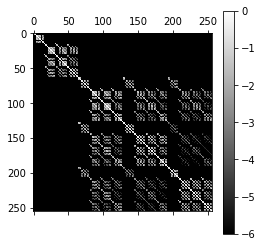

In [82]:
plt.matshow(PLog(full_process), cmap="gray")
plt.colorbar()
plt.savefig("matrix_plot.png", format="png", dpi=300)

In [ ]:
gain = 0
degradation = 0
Repeat several times:
    1. Take a random correctable error E
    2. E' = E.S
    3. Look at the chi-matrix element x = chi_{E,E'}
    4. If x is positive, then it adds to degradation; else it adds to a gain.
                                               
effect = gain - degradation